# Uke 3: Gjør det interaktivt

I denne notatboken vil vi utforske hvordan man kan lage ***interaktive*** datavisualiseringer ved hjelp av Vega-Altair. Vi introduserte først [Altair](https://altair-viz.github.io/) i [DIGI118 Modul 1: Heisann, Altair!](https://www.kaggle.com/code/lauragarrison/digi118-modul-1-heisann-altair) og introduserte metoder for å tilpasse og finjustere visualiseringer i [DIGI118 Modul 2: Det riktige diagrammet for jobben](https://www.kaggle.com/code/amykzhang/digi118-modul-2-det-riktige-diagrammet-for-jobben). 

Nøkkelen til mange gode visualiseringer er brukerens evne til å samhandle med den gitte visualiseringen. Altairs høynivågrammatikk gjør det enkelt å implementere interaktivitet med bare noen få kodelinjer. Denne uken skal vi utforske interaktivitet som en mulighet til å engasjere seg i dataene våre. Målet for uken er å implementere **Shneidermans mantra** med diagrammene våre: *Oversikt først, zoom og filtrer, detaljer på forespørsel*. 

I denne modulen vil du lære om Altairs interaktivitet ved hjelp av værdatasettene Titanic og Bergen. Deretter vil du bruke disse konseptene til å legge til interaktivitet i de to kartene du har laget for DIGI118-oppgaven.
- *Zoom* med `.interactive()`.
- *Filter* med valg og betingelser
- *Detaljer på forespørsel* med verktøytips


**La oss komme i gang!**

---

### Lag først en kopi av denne notatboken ved hjelp av knappen øverst til høyre i dette vinduet.
Nå er du klar til å kode i din egen versjon av denne notatboken.

# 1. Importere og lese data
Som vanlig må vi først importere bibliotekene `pandas` og `altair`:

In [2]:
import pandas as pd
import altair as alt

La oss også lese inn [Titanic-datasettet](https://www.kaggle.com/datasets/amykzhang/titanic-dataset-with-coordinates), som vi vil bruke som input i denne notatboken.

In [3]:
titanic = pd.read_csv("titanic_coord.csv")

# 2. Oversikt først
Vi tenker først på hvilke spørsmål vi er interessert i å utforske i dataene våre. Deretter kan vi utforme et diagram (ved hjelp av Altair-konseptene vi har lært så langt) og legge til interaktivitet som hjelper oss med å finne svar på det vi lurer på. 

For eksempel: ***Hvem var passasjerene på Titanic?*** Var de yngre eller eldre? Var de menn eller kvinner? Hadde de høyere eller lavere sosioøkonomisk status (som vi kan utlede av billettkostnadene)?

La oss begynne med å lage en visualisering som kan hjelpe oss med å utforske disse spørsmålene. Dette er **oversiktslaget** i Shneidermans mantra.

In [4]:
# Draw chart
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N"
)

alt.Chart(...)

Det er vanskelig å skille disse datapunktene fra hverandre på grunn av overplotting. La oss legge til litt interaktivitet for å hjelpe deg med det.

# 3. Zoom...
Det neste laget i Shneidermans mantra er å **zoome og filtrere**.

I Altair kan vi zoome og panorere langs et diagram ved å legge til metoden `.interactive()` på slutten av Chart-objektet vårt. Med bare én kodelinje kan vi umiddelbart gi diagrammene våre interaktivitet. Så flott!

Interaksjon med diagrammet ligner på å bruke et verktøy som Google Maps. Prøv disse selv:
- For å **zoome** kan du bla inn og ut av diagrammet.
- For å **panorere**, klikk og dra inne i diagrammet.

In [5]:
# Draw chart with zoom and pan interactivity
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N"
).interactive()

alt.Chart(...)

---
## 3a. Prøv deg selv! 📝
Lag et diagram etter eget valg ved hjelp av Titanic-datasettet. Gjør dette diagrammet interaktivt ved hjelp av `.interactive()`.

In [6]:
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N"
).interactive()

alt.Chart(...)

---
# 4. ...og filtrer

I Altair kan vi **filtrere** datapunktene i et diagram. Filterinteraksjoner er basert på tre kjernekonsepter i Altairs grammatikk for visualisering:
1. **Parametere** er de grunnleggende byggesteinene i interaksjonen som kontrollerer aspekter ved et diagrams utseende eller oppførsel. Dette kan være enkle **variabler** som lagrer verdier du ønsker å gjenbruke. Eller de kan være komplekse **valg** som gjør det mulig for brukeren å endre dataene som vises i diagrammet ved hjelp av egne handlinger (f.eks. museklikk).
2. En **betingelse** bestemmer hvordan en parameter påvirker et diagramelement basert på en bestemt logikk. Betingelser brukes for eksempel til å endre farge eller opasitet basert på om datapunktene er valgt eller ikke.
3. **Widgets** er brukergrensesnittelementer (som legender, glidebrytere, rullegardinmenyer eller avkrysningsbokser) som lar brukerne justere parametere ved hjelp av handlinger (f.eks. ved å klikke).

I denne modulen viser vi deg to måter å filtrere data på: 1) ved å klikke på en interaktiv tegnforklaring og 2) ved å børste over koblede diagrammer. Det finnes mange andre måter som vi ikke tar for oss her, men som er tilgjengelige i [Altair-dokumentasjon](https://altair-viz.github.io/user_guide/interactions.html).

## 4a. Interaktiv tegnforklaring

Med en interaktiv tegnforklaring kan brukerne filtrere data i diagrammet ved å klikke på kategorier i tegnforklaringen. 

### Hvordan klikker vi på kategorier i en tegnforklaring?
Det første trinnet er å opprette en **valgparameter** som gjør det mulig å klikke på tegnforklaringen. En type utvelgelse, punktutvelgelse eller `selection_point()`, gjør det mulig for brukere å velge diagramelementer ett om gangen ved hjelp av musebevegelser, for eksempel ved å klikke eller holde musepekeren. Som standard velger `selection_point()` ting ved å klikke. 

Vi kan imidlertid gjøre valget mer spesifikt ved å legge til argumenter innenfor parentesen.
- **Mål for valg:** For alle andre enn de enkleste valgene må brukeren tenke på nøyaktig hva som er målet for valget. Målet kan styres med enten `fields` eller `encodings`-argumenter. 
- **Valg av binding:** Hvis vi ønsker å foreta et valg ved hjelp av et eksternt diagramelement eller en ekstern widget (f.eks. tegnforklaring, alternativknapp, avkrysningsrute, glidebryter, nedtrekksmeny), må vi `bind` valget til den aktuelle widgeten.

I tilfellet med vår titaniske tegnforklaring: 
- Siden legenden representerer datafeltet "Sex", gjør vi dette feltet til vårt valgmål ved å bruke argumentet `fields=["Sex"]`.
- Hvis vi ønsker å styre utvalget ved hjelp av en tegnforklaring, binder vi utvalget til tegnforklaringen ved hjelp av argumentet `bind="legend"`.

In [9]:
# Specify a point selection targeting the field "Sex". Bind this selection to the legend.
select_legend = alt.selection_point(fields=["Sex"], bind="legend")

### Hvordan vil vi at diagrammet skal se ut etter at vi har klikket på legenden? 
Neste trinn er å spesifisere en **betingelse** for utvelgelsesparameteren vår ved hjelp av `condition()`. 

Når det gjelder filtrering, ønsker vi å gjøre de valgte datapunktene mer synlige enn de andre punktene. Her skriver vi en betingelse som endrer opaciteten til punktene når de er valgt.

In [10]:
# Write a condition that changes the opacity of points based on the selection
opacity_selection = alt.condition(
    select_legend, # the selection parameter tied to this condition
    alt.value(0.8), # make points visible if selected (i.e., condition = True)
    alt.value(0.2), # make points almost transparent if not selected (i.e., condition = False)\
    empty=True # set data points to be visible by default (i.e. when not interacting with the legend) 
)

### Koble utvalget og betingelsen til diagrammet
For å legge til valgparameteren `select_legend` i diagrammet bruker vi metoden `add_params()`. Vi lenker metoden til slutten av diagrammet og setter parameteren inn i parentesen.

For å legge til betingelsen `opacity_selection` i diagrammet, tilordner vi den til opacity encoding channel. Dette forteller Altair at opaciteten i dette diagrammet skal endres basert på betingelsen vi har beskrevet ovenfor.

Når alt er koblet sammen, kan vi nå klikke på de ulike kategoriene i legenden for å filtrere ut datapunkter. Prøv det selv!

In [11]:
# Draw chart with interactive legend and zoom + pan
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N",
    opacity = opacity_selection
).add_params(
    select_legend
).interactive() # And yes, we can combine different interactions!

alt.Chart(...)

## 4b. Børsting og kobling
Brushing og linking refererer til sammenkoblingen av to eller flere diagrammer med de samme dataene - når du velger en del av dataene i ett diagram, kan du filtrere (eller fremheve) tilsvarende data i andre diagrammer.

La oss utforske denne filtreringsteknikken ved å opprette et sammensatt diagram, som er et diagram som er satt sammen av andre underdiagrammer. Vi tegner et annet diagram som viser antall passasjerer som overlevde Titanic (i datasettet vårt er `0` = overlevde ikke, `1` = overlevde).

In [1]:
# Draw first chart
passenger_chart = alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = alt.Color("Sex:N", legend=alt.Legend(orient='left')) #Move legend to the left of chart
)

# Draw second chart
survivor_chart = alt.Chart(titanic, title="How many passengers survived the Titanic?").mark_bar().encode(
    alt.X("count():Q"),
    alt.Y("Survived:N")
)

# Combine charts
passenger_chart | survivor_chart

NameError: name 'alt' is not defined

### Hvordan velger vi et utvalg av datapunkter i diagrammet vårt?

På samme måte som når vi lager en interaktiv tegnforklaring, er neste trinn å lage en **valgparameter** som lar oss gjøre valg i det venstre diagrammet. 

Vi introduserer en ny type valg som kalles intervallvalg eller `selection_interval()`. Med denne funksjonen kan brukerne velge (et utvalg av) diagramelementer ved å klikke og dra. 

På samme måte som med punktvalg kan vi gjøre intervallvalget mer spesifikt ved å legge til argumenter innenfor parentesen. Hvis vi for eksempel bare vil velge x-aksen, kan vi gjøre denne `encoding`-kanalen til vårt valgmål ved hjelp av argumentet `encodings=["x"]`.

In [13]:
# Specify an interval selection (brushing interaction) targeting the x-axis encoding.
brush_axis = alt.selection_interval(encodings=["x"])

### Hvordan vil vi at diagrammet skal se ut etter at vi har gjort et utvalg? 
På samme måte som med den interaktive legenden, er neste trinn for børsting og kobling å opprette en **betingelse** for intervallvalget vårt. La oss skrive en betingelse ved hjelp av `condition()` som endrer opaciteten til punktene.

In [14]:
# Write another condition that changes the opacity of points based on the axis interval selection
opacity_brush = alt.condition(
    brush_axis, 
    alt.value(0.8), 
    alt.value(0.2), 
    empty=True
)

### Koble utvalget og betingelsen til begge diagrammene
Målet vårt er å koble sammen de to diagrammene, slik at en bruker kan foreta et intervallvalg i det venstre diagrammet for å filtrere de tilsvarende dataene i det høyre diagrammet.

For det venstre diagrammet som vi velger, legger vi til valgparameteren `brush_axis` ved hjelp av metoden `add_params()`. Vi må selvfølgelig ikke glemme å tilordne betingelsen `opacity_brush` til opasitetskanalen; dette endrer synligheten til datapunktene når vi gjør et utvalg.

Prøv å klikke og dra rundt i diagrammet for å se om interaksjonen fungerer.

In [15]:
# Draw first chart with selection parameter and opacity condition
passenger_chart = alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = alt.Color("Sex:N", legend=alt.Legend(orient='left')),
    opacity = opacity_brush
).add_params(
    brush_axis
)

passenger_chart

alt.Chart(...)

For det høyre diagrammet som vi filtrerer, legger vi til utvalgsparameteren `brush_axis` ved hjelp av `transform_filter()`. Filtertransform-metoden fungerer i stor grad på samme måte som en betingelse - den fjerner data basert på utvalgsparameteren vi har gitt den. Datapunkter som ligger innenfor utvalget, beholdes, mens datapunkter som ligger utenfor, filtreres bort.

Nå som alt er koblet sammen, kan vi prøve å børste og koble sammen det sammensatte diagrammet vårt. Prøv det selv!

In [16]:
# Draw second chart that is being transformed/filtered by the selection parameter
survivor_chart = alt.Chart(titanic, title="How many passengers survived the Titanic?").mark_bar().encode(
    alt.X("count():Q"),
    alt.Y("Survived:N")
).transform_filter(
    brush_axis
)

# Combine charts
passenger_chart | survivor_chart

alt.HConcatChart(...)

---
## 4c. Prøv deg selv! 📝
I eksemplene ovenfor viste vi hvordan du filtrerer data ved hjelp av punkt- og intervallvalg samt betingelser som endrer opasiteten til punktene. 

Prøv å lage et diagram (eller koblede diagrammer) som lar brukeren utheve data i stedet for å filtrere dem bort. Prøv å bruke `selection_point()` og `condition()` for å endre **fargen** på datapunktene.

In [ ]:
### YOUR CODE HERE

---
# 5. Detaljer på forespørsel
Det siste interaksjonslaget er **detaljer på forespørsel**, som refererer til teknikker som gir flere detaljer om datasettet etter at brukeren har bedt om dem.

En måte å gi mer informasjon om datapunkter på, er ved hjelp av verktøytips. Verktøytips er tekstbokser som viser mer informasjon om datapunktet når du holder musepekeren over det.

I Altair kan vi legge til verktøytips i diagrammet ved hjelp av kodingskanalen `tooltip`. Vi legger til alle datafeltene vi ønsker å vise, i en liste og tilordner dem til kanalen:

In [17]:
# Draw chart with tooltips
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N",
    tooltip = ["Name:N", "Age:Q", "Fare:Q", "Sex:N"]
)

alt.Chart(...)

For å gi nytt navn til et verktøytips kan vi bruke funksjonen `alt.Tooltip()` når vi spesifiserer verktøytipset. Hvis vi for eksempel vil gi nytt navn til feltet "Name" til "Passenger" i verktøytipset, kan vi gjøre dette slik:

In [18]:
# Draw chart with tooltips with customized label name.
alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = "Sex:N",
    tooltip = [alt.Tooltip("Name:N", title="Passenger"), "Age:Q", "Fare:Q", "Sex:N"]
)

alt.Chart(...)

# 6. Sette det hele sammen
Vi kan kombinere flere typer interaksjoner så lenge de utfyller hverandre. Det er for eksempel ikke lurt å kombinere to interaksjoner som begge endrer opasiteten til punkter betinget. I stedet kan vi ha én interaksjon som endrer opasitet, og en annen interaksjon som endrer farge eller størrelse.

In [19]:
########################
# Interaction
########################

# Specify an interval selection (brushing interaction) targeting both the x- and y-axis encoding.
brush_axis = alt.selection_interval(encodings=["x", "y"])

# Write a condition that changes the opacity of points based on the axis interval selection
opacity_brush = alt.condition(
    brush_axis, 
    alt.value(0.8), 
    alt.value(0.2), 
    empty=True
)

# Specify a point selection targeting the field "Sex". Bind this selection to the legend.
select_legend = alt.selection_point(fields=["Sex"], bind="legend")

# Write a condition that changes the color of points based on the selection
color_selection = alt.condition(
    select_legend, 
    alt.Color("Sex:N", legend=alt.Legend(orient='left')), # set data points to default color if selected
    alt.value("lightgray"), # set data points to gray if unselected
    empty=True 
)

########################
# Chart
########################

# Draw first chart with selection parameter and opacity condition
passenger_chart = alt.Chart(titanic, title = "Who were the passengers of the Titanic?").mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color = color_selection,
    opacity = opacity_brush
).add_params(
    brush_axis,
    select_legend
)

# Draw second chart that is being transformed/filtered by the selection parameter
survivor_chart = alt.Chart(titanic, title="How many passengers survived the Titanic?").mark_bar().encode(
    alt.X("count():Q"),
    alt.Y("Survived:N")
).transform_filter(
    brush_axis
)

# Combine charts
passenger_chart | survivor_chart

alt.HConcatChart(...)

# To do: Oppgave 1c
Din oppgave nå er å aktivere børsting og kobling i de to visualiseringene fra Oppgave 1a og 1b. Med andre ord, når du velger en tidsperiode i tidsdiagrammet, vil punktdiagrammet oppdateres og kun vise sykkelstasjonsdata fra denne tidsperioden.

Lag en kopi av Kaggle Notebook [DIGI118 Oppgave 1c - Blank](https://www.kaggle.com/code/amykzhang/digi118-oppgave-1c-blank) og fyll ut notatboken med din egen kode. Dette vil være den tredje byggesteinen i dashbordvisualiseringen som du skal jobbe mot.

**Lykke til med oppgaven, og ta gjerne kontakt/kom på gruppemøtet hvis du har spørsmål eller trenger hjelp!

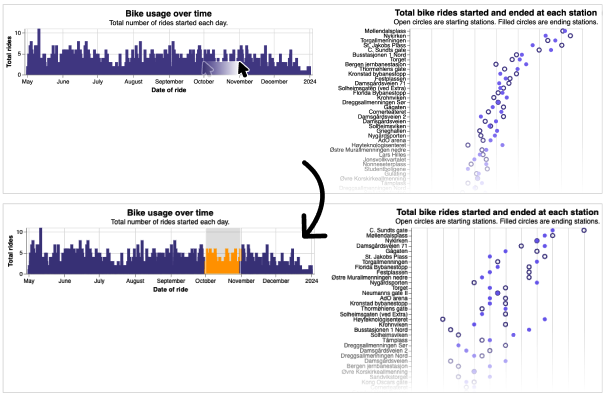

---
# Kilder

**Note:** Denne modulen er delvis basert på [Altair User Guide to Interactive Charts](https://altair-viz.github.io/user_guide/interactions.html)

**Datasett som brukes i denne modulen:** 
- Titanic Dataset with Coordinates: https://www.kaggle.com/datasets/amykzhang/titanic-dataset-with-coordinates
- Bergen Weather Data 2023: https://www.kaggle.com/datasets/amykzhang/bergen-weather-data-2023

---
By Ke Er Zhang and Laura Garrison. © Copyright 2024.